4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 18s 55ms/step - loss: 0.4769 - accuracy: 0.0033 - val_loss: 0.4030 - val_accuracy: 0.0159
Epoch 2/5
235/235 [==============================] - 4s 18ms/step - loss: 0.3803 - accuracy: 0.0163 - val_loss: 0.3657 - val_accuracy: 0.0193
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.3552 - accuracy: 0.0120 - val_loss: 0.3499 - val_accuracy: 0.0106
Epoch 4/5
235/235 [==============================] - 4s 19ms/step - loss: 0.3439 - accuracy: 0.0114 - val_loss: 0.3416 - val_accuracy: 0.0146
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 0.3369 - accuracy: 0.0132 - val_loss: 0.3357 - val_accuracy: 0.0171


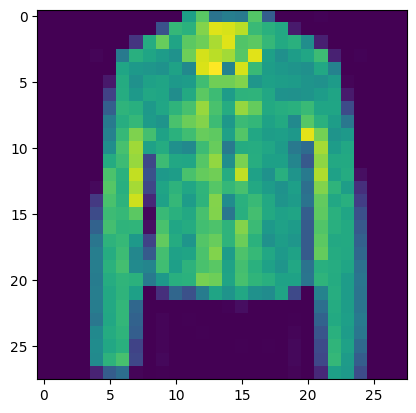

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
# this is the size of our encoded representations
encoding_dim = 64   

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Adding of one more layer to the encoder
encoded_1 = Dense(4, activation='relu')(encoded)
# Adding of one more layer to the decoder
decoded_1 = Dense(encoding_dim, activation='sigmoid')(encoded_1)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(decoded_1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#visualization of the test data before reconstruction
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
plt.imshow(x_test[10].reshape(28,28))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

313/313 [==============================] - 1s 2ms/step


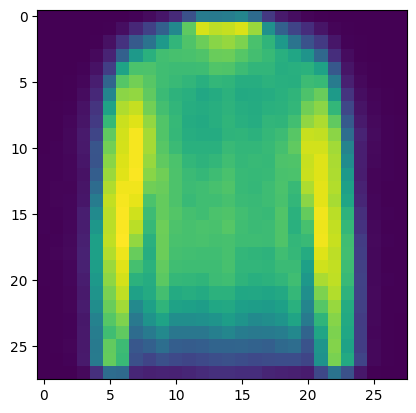

In [2]:
# Reconstructed version of the test data
X_test = autoencoder.predict(x_test)
plt.imshow(X_test[10].reshape(28,28))

Denoisening Autoencoder

Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.4193 - accuracy: 0.0068 - val_loss: 0.3401 - val_accuracy: 0.0052
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3379 - accuracy: 0.0103 - val_loss: 0.3110 - val_accuracy: 0.0089
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3227 - accuracy: 0.0110 - val_loss: 0.2958 - val_accuracy: 0.0080
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3146 - accuracy: 0.0113 - val_loss: 0.2857 - val_accuracy: 0.0082
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.3097 - accuracy: 0.0121 - val_loss: 0.2787 - val_accuracy: 0.0086
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3066 - accuracy: 0.0125 - val_loss: 0.2738 - val_accuracy: 0.0096
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.3046 - accuracy: 0.0126 - val_loss: 0.2705 - val_accuracy: 0.0094

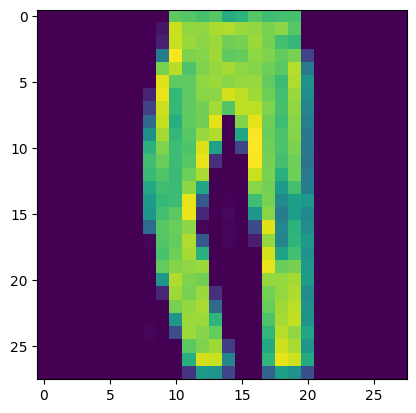

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder_n = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder_n.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
plt.imshow(x_test[5].reshape(28,28))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
plt.imshow(x_test[5].reshape(28,28))
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# plt.imshow(x_test_noisy[5].reshape(28,28))
autoencoder_n.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


313/313 [==============================] - 1s 2ms/step


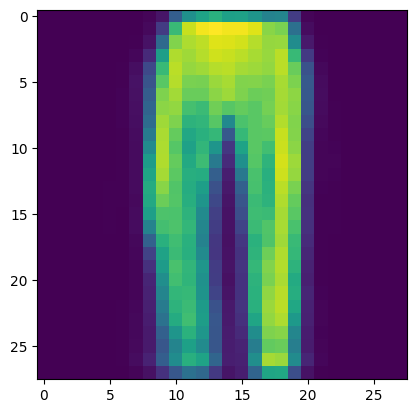

In [4]:
X_test_ = autoencoder_n.predict(x_test)
plt.imshow(X_test_[5].reshape(28,28))

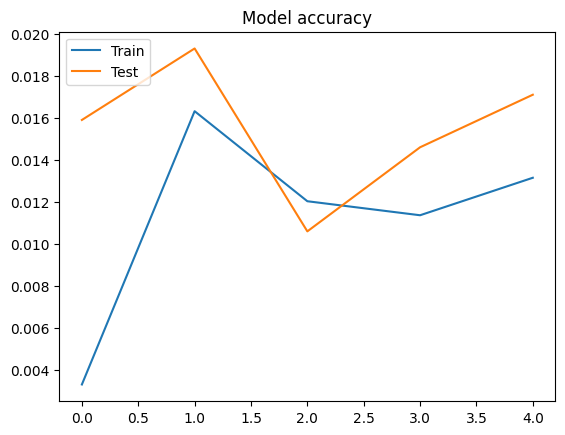

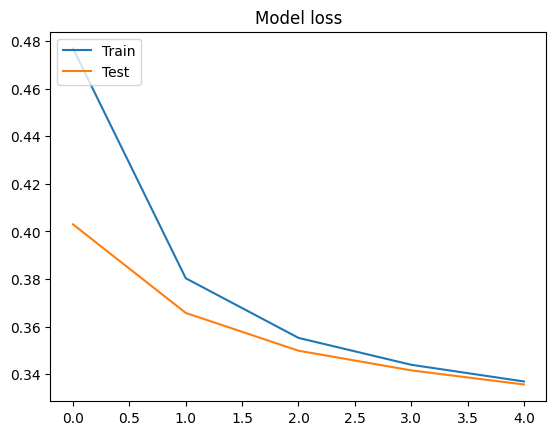

In [5]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()